# import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#Sci-kit Learn
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

# Seting config

In [ ]:
# Change settings to ouput dataframes
from sklearn import set_config
set_config(transform_output='pandas')

seed = 42

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# loading Data set

In [ ]:
share_link = 'https://drive.google.com/file/d/1-E3J7MBvJI3tvLoicOfnx_mqAdalg8PZ/view?usp=sharing'
file_id    = share_link.split("/d/")[1].split("/view")[0]
url        = f"https://drive.google.com/uc?export=download&id={file_id}"

# Defining original dataframe
df_OG= pd.read_csv( url )
df_OG.sample(5)
df_OG.shape

(232725, 18)

- Dropping object columns with high cardinality
- 'track_id' , 'artist_name' ,  'track_name'

In [ ]:
# defining datarame df for further analysis
df = df_OG.copy()
df.drop(['track_id','artist_name' , 'track_name'], axis=1 ,inplace=True)
df.sample(5)

genre  popularity  acousticness  danceability  duration_ms  \
157275        Ska          56        0.0521         0.742       309107   
210865      World          33        0.9720         0.149       149800   
122862     Reggae          53        0.0138         0.678       217024   
17183       Dance          52        0.1550         0.332       187360   
123667  Classical           8        0.9850         0.711        67499   

        energy  instrumentalness key  liveness  loudness   mode  speechiness  \
157275  0.5320          0.004000   D     0.115    -7.642  Minor       0.0401   
210865  0.0535          0.940000  C#     0.093   -25.007  Major       0.0406   
122862  0.7170          0.000004  A#     0.104    -6.565  Major       0.2560   
17183   0.7770          0.000000   E     0.179    -4.493  Major       0.0534   
123667  0.1580          0.000077   B     0.187   -17.786  Minor       0.4380   

          tempo time_signature  valence  
157275   77.996            4/4   0.7100  
210865  138.255            3/4   0.0375  
122862   99.098            4/4   0.4510  
17183    98.761            4/4   0.2940  
123667  116.709            4/4   0.1960

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   popularity        232725 non-null  int64  
 2   acousticness      232725 non-null  float64
 3   danceability      232725 non-null  float64
 4   duration_ms       232725 non-null  int64  
 5   energy            232725 non-null  float64
 6   instrumentalness  232725 non-null  float64
 7   key               232725 non-null  object 
 8   liveness          232725 non-null  float64
 9   loudness          232725 non-null  float64
 10  mode              232725 non-null  object 
 11  speechiness       232725 non-null  float64
 12  tempo             232725 non-null  float64
 13  time_signature    232725 non-null  object 
 14  valence           232725 non-null  float64
dtypes: float64(9), int64(2), object(4)
memory usage: 26.6+ MB


- No missing values identified

In [ ]:
#check for duplicates
df.duplicated().sum()

np.int64(84)

# Unique values in each column
- checking for ordinal featuers


In [ ]:
df.nunique()

genre                  27
popularity            101
acousticness         4734
danceability         1295
duration_ms         70749
energy               2517
instrumentalness     5400
key                    12
liveness             1732
loudness            27923
mode                    2
speechiness          1641
tempo               78512
time_signature          5
valence              1692
dtype: int64

- print unique items in colums with unique value count less than 30

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    if df[column].nunique() < 30:
        print(f"{column}: {df[column].nunique()} unique values")
        print(unique_values)
        print("-" * 40)

genre: 27 unique values
['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']
----------------------------------------
key: 12 unique values
['C#' 'F#' 'C' 'F' 'G' 'E' 'D#' 'G#' 'D' 'A#' 'A' 'B']
----------------------------------------
mode: 2 unique values
['Major' 'Minor']
----------------------------------------
time_signature: 5 unique values
['4/4' '5/4' '3/4' '1/4' '0/4']
----------------------------------------


# Defining (X , Y)

In [ ]:
#convert target to Binary target (1=liked, 0=disliked)
y = df['popularity'].apply(lambda x: 1 if x >= 50 else 0)


In [ ]:
X = df.select_dtypes(include=['float','int']).drop('popularity', axis=1)
X.sample(5)

acousticness  danceability  duration_ms  energy  instrumentalness  \
190105        0.0022         0.534       222467   0.956          0.000002   
49128         0.0924         0.501       285387   0.886          0.000011   
54390         0.5250         0.378       217427   0.186          0.000000   
134705        0.4260         0.662       289493   0.738          0.000000   
100002        0.1040         0.600       292293   0.865          0.677000   

        liveness  loudness  speechiness    tempo  valence  
190105    0.0915    -2.557       0.0429  151.941   0.7350  
49128     0.5990    -5.850       0.0885  121.053   0.7970  
54390     0.1590   -17.681       0.0366  106.685   0.0892  
134705    0.0913    -7.251       0.0354  106.978   0.8520  
100002    0.1160    -5.630       0.0393  125.992   0.4010

# **EXPLORATORY DATA ANALYSIS (EDA)**

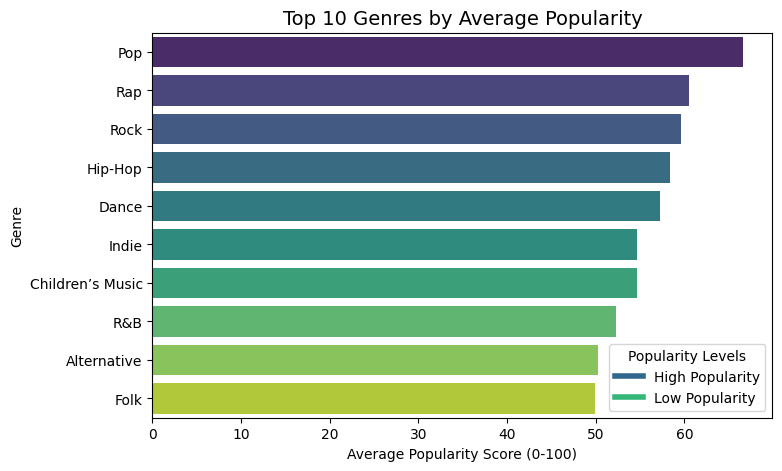

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute top genres
top_genres = df.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")

# Add title and labels
plt.title("Top 10 Genres by Average Popularity", fontsize=14)
plt.xlabel("Average Popularity Score (0-100)")
plt.ylabel("Genre")

# Manually create a legend
legend_labels = ["High Popularity", "Low Popularity"]  # Modify these based on how colors are mapped
legend_colors = sns.color_palette("viridis", len(legend_labels))  # Extract colors from Viridis palette
legend_patches = [plt.Line2D([0], [0], color=legend_colors[i], lw=4, label=legend_labels[i]) for i in range(len(legend_labels))]

plt.legend(handles=legend_patches, title="Popularity Levels", loc="best")

plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


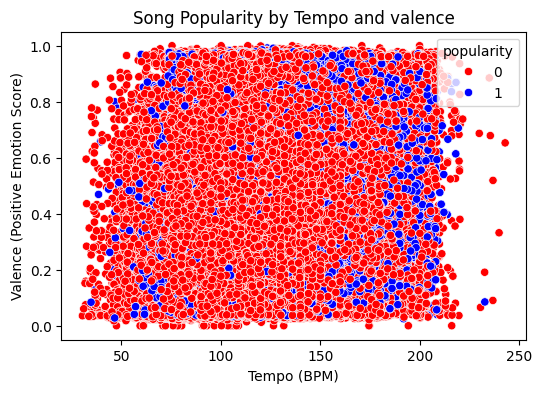

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["tempo"], y=df["valence"], hue=y, palette= {1: "blue", 0: "red"}, hue_order=[0, 1])


# Labels and title
plt.xlabel("Tempo (BPM)")
plt.ylabel("Valence (Positive Emotion Score)")
plt.title("Song Popularity by Tempo and valence")

# Show the plot
plt.show()
#EXPLORATORY DATA ANALYSIS

# Remove the manual plt.legend() call
# plt.legend(title="Popularity", labels=['liked', 'Disliked'])

In [ ]:
# Defining Numerical featuers
X.columns
num_featuers = X.select_dtypes(include=['float','int']).columns
num_featuers

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')

# Feature correlation with the dependent variable y ( using the Pearson Correlation )

- +1 → perfect positive linear relationship

-  0 → no linear relationship

- –1 → perfect negative linear relationshi

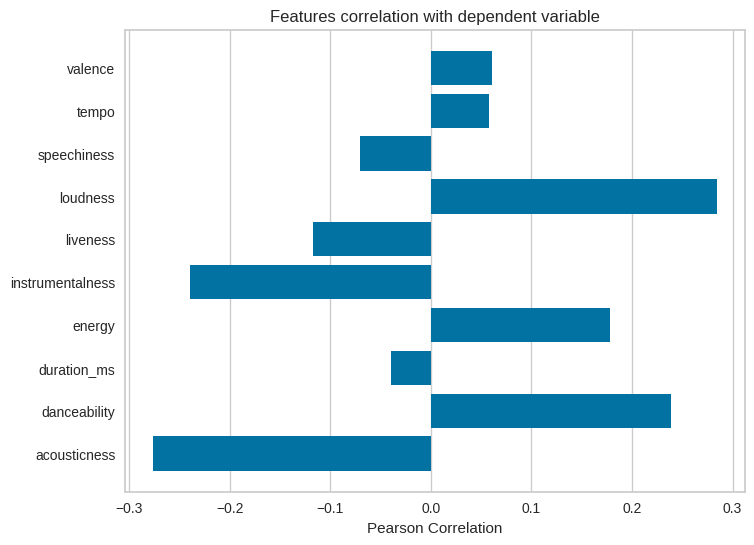

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [ ]:
from yellowbrick.target import FeatureCorrelation

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels= num_featuers)

plt.rcParams['figure.figsize']=(8,6)
# Fiting  data to the visualizer
visualizer.fit(X[num_featuers], y)
visualizer.show()

# Pairwise Relationships Between Numeric Audio Features
- ( sampled : 1000 )

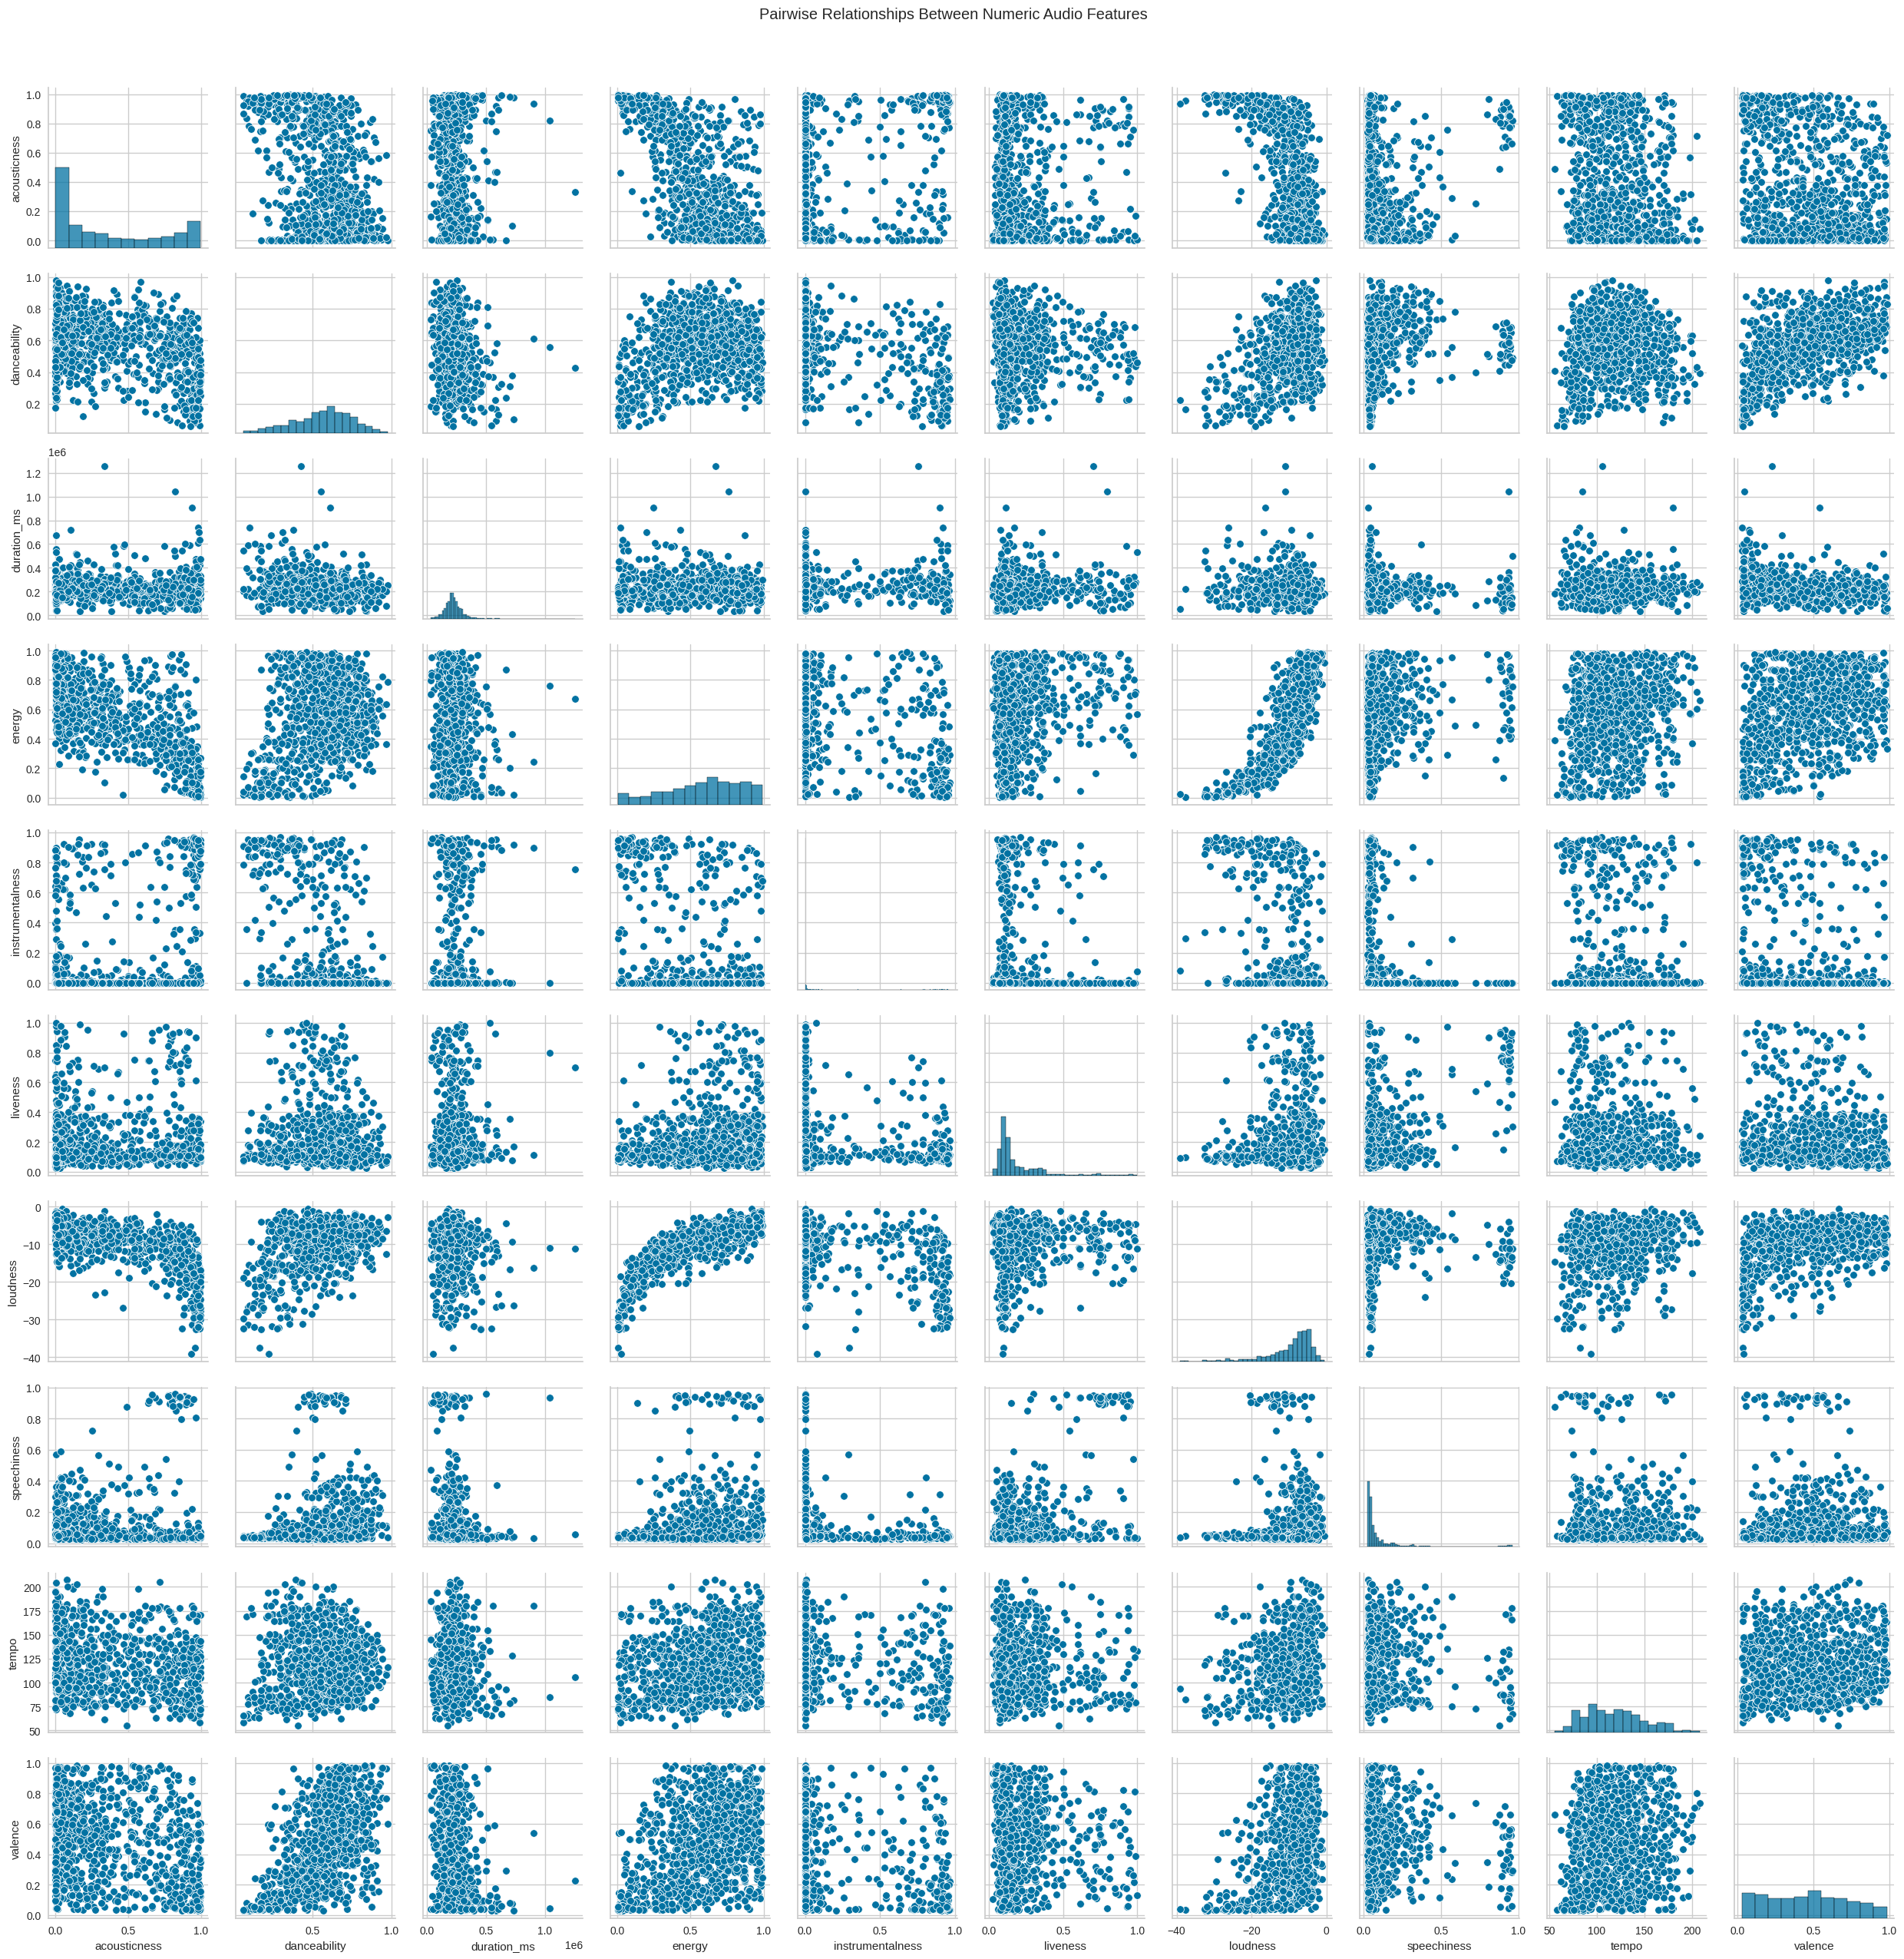

In [ ]:

# Creating a pair plot
sns.pairplot(X[num_featuers].sample(1000, random_state=42))
plt.suptitle("Pairwise Relationships Between Numeric Audio Features", y=1.02)
plt.tight_layout()
plt.show()


# Checking for outliers

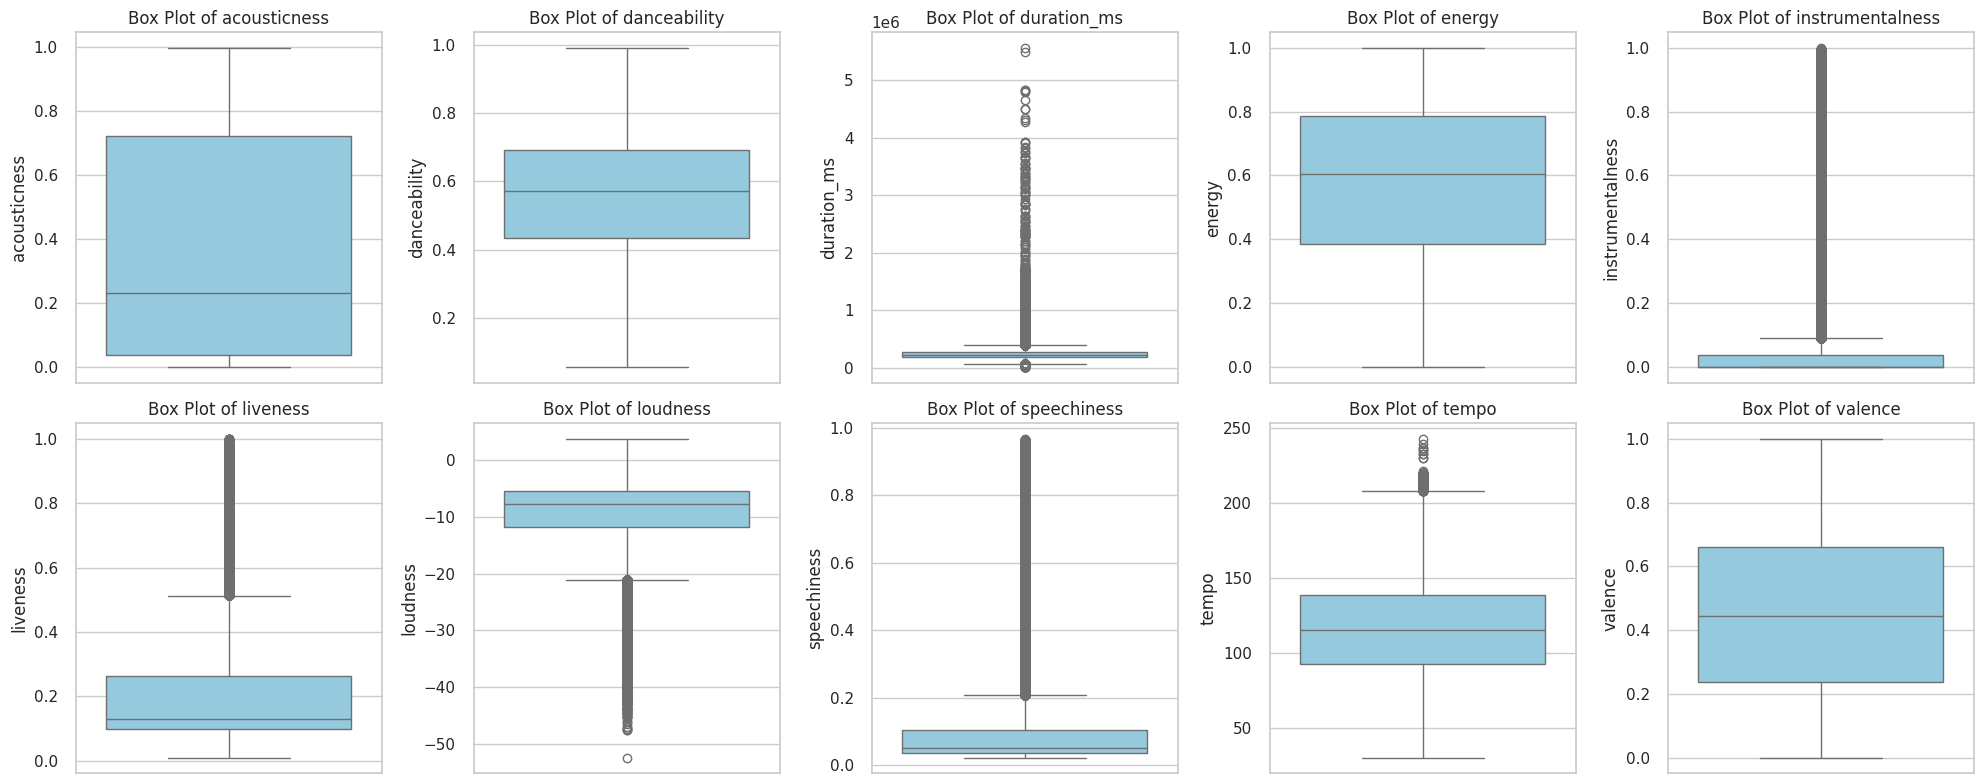

In [ ]:

# Seting plot style
sns.set(style="whitegrid")

# List of continuous features
features = [
    'acousticness', 'danceability', 'duration_ms', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence'
]

# Create subplots of box plots
plt.figure(figsize=(20, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(y=X[feature], color='skyblue')
    plt.title(f'Box Plot of {feature}')
    plt.xlabel('')
    plt.tight_layout()

plt.show()


# Characteristics of Different Genres

- comparing the different genres to understand their unique differences in sound using the audio fetuers

In [ ]:
top10_genres = df.nlargest(10, 'popularity')


fig = px.bar(top10_genres, x='genre', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

# Data Spliting


In [ ]:
#split data
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

# Pipline for numeric featuers

In [ ]:
#scale numeric features
scaler = StandardScaler()

num_pipline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

num_tuple = ('numerical', num_pipline, num_featuers)
num_tuple

('numerical',
 Pipeline(steps=[('scaler', StandardScaler())]),
 Index(['acousticness', 'danceability', 'duration_ms', 'energy',
        'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
        'valence'],
       dtype='object'))

# Transforming Data

In [ ]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([num_tuple] ,remainder='passthrough',verbose_feature_names_out=False )

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed

acousticness  danceability  duration_ms    energy  instrumentalness  \
200510      0.254708     -2.297327    -0.947021 -1.232576          2.704547   
19161      -0.986184     -0.831683    -0.154939  0.695659         -0.489892   
130619     -1.036463     -0.799353    -0.203682  1.416849         -0.460590   
215414     -0.491969      1.350618    -0.371236 -0.002757         -0.489844   
226822      0.547743      0.348376     0.330823 -0.393718         -0.455206   
...              ...           ...          ...       ...               ...   
119879      0.260343      1.377560    -0.032079 -0.712560         -0.489892   
103694     -0.845584     -0.729304    -1.141615  0.540034          1.297276   
131932     -1.014192      0.628573    -0.235140  0.968952         -0.489185   
146867     -1.036034      0.817167     0.281829  0.566604         -0.237178   
121958     -0.997737      0.181336    -0.260691  1.048663         -0.489892   

        liveness  loudness  speechiness     tempo   valence  
200510 -0.583349 -1.237004    -0.470917 -1.134298 -1.163965  
19161   0.508101  0.945491    -0.462826  1.370630 -0.860182  
130619  0.674542  0.738419    -0.254610  0.724603  0.704878  
215414 -0.551070  0.226489    -0.503822  0.284488  1.174011  
226822  0.548450  0.036243    -0.146726 -1.349176  0.120384  
...          ...       ...          ...       ...       ...  
119879 -0.369498 -0.279445    -0.051788  0.236029 -0.664069  
103694  0.382009  0.117872    -0.124070  2.236682  0.385713  
131932 -0.706919  0.715597    -0.316643 -0.734290  0.831774  
146867 -0.840072  0.332107    -0.517847 -0.832083  1.504711  
121958  1.113342  0.806388    -0.286435 -0.603123 -0.287224  

[186180 rows x 10 columns]

In [ ]:
X_test_processed

acousticness  danceability  duration_ms    energy  instrumentalness  \
788        -1.033183     -1.225036    -0.343568  1.003114         -0.489396   
207109      1.587455     -1.623778    -1.106477 -1.863428          1.386469   
138644     -0.945329      1.436832    -0.081449  0.631131         -0.445626   
37164      -1.026533      1.027314    -0.081758  0.763982         -0.113298   
174351      1.680438     -0.282067     0.441753  0.885446         -0.489576   
...              ...           ...          ...       ...               ...   
222343     -1.038541     -0.837072    -0.030891  1.451011         -0.489808   
202019      0.976026     -1.758488    -0.402025 -1.035198          2.552588   
42481       1.429667     -0.298232     0.284967 -0.625258         -0.464554   
159984      0.181449      1.873293    -0.204811  0.445140         -0.489892   
190152     -0.853755     -0.260513    -0.021629  0.038996         -0.489842   

        liveness  loudness  speechiness     tempo   valence  
788    -0.243406  0.770072    -0.322037  1.751442 -0.267997  
207109 -0.628743 -1.488887    -0.413739 -0.218783 -1.561190  
138644 -0.419935  0.546341     0.493026  0.656430  1.277835  
37164  -0.721546  0.937161    -0.162908  0.499269 -1.094749  
174351  3.463692 -0.060046     3.702575 -0.424500 -1.037068  
...          ...       ...          ...       ...       ...  
222343 -0.334192  0.882686    -0.244900  1.829812  0.385713  
202019 -0.127402 -0.671764    -0.473614 -1.772167 -1.584647  
42481  -0.584358 -0.712245    -0.469299 -0.866881 -0.464110  
159984 -0.664048  0.953820     0.163980  0.399114 -0.098802  
190152 -0.389673 -0.435373    -0.302079  0.743767  0.028095  

[46545 rows x 10 columns]

# **SUPERVISED LEARNING**

RANDOM FOREST CLASSIFIER

              precision    recall  f1-score   support

           0       0.88      0.91      0.90     29540
           1       0.84      0.79      0.81     17005

    accuracy                           0.87     46545
   macro avg       0.86      0.85      0.85     46545
weighted avg       0.87      0.87      0.87     46545



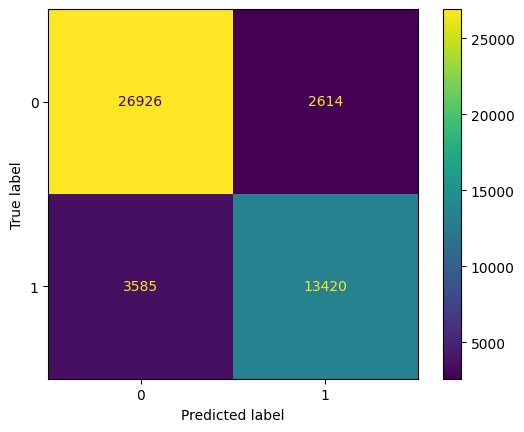

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

rf_model0 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model0.fit(X_train_processed, y_train)

y_pred = rf_model0.predict(X_test_processed)

print(classification_report(y_test, y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model0.classes_)
disp.plot()
plt.show()

In [ ]:
#accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8668170587603394


Text(0, 0.5, 'Feature')

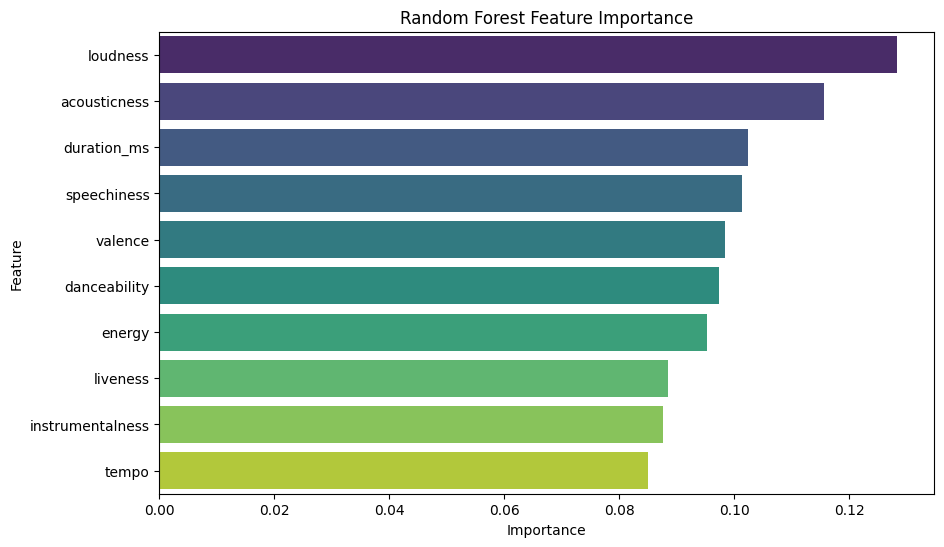

In [ ]:
# feature importance
importances = rf_model0.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#visualize using bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

DEEP LEARNING (FEED FROWARD NEURAL NETWORK)

In [ ]:
model_nn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')])

#compile model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train
history = model_nn.fit(X_train_processed, y_train, epochs=10, batch_size=32, validation_split=0.2 , verbose = 0)

#evaluate
y_pred_nn = (model_nn.predict(X_test_processed) > 0.5).astype(int)

print(classification_report(y_test, y_pred_nn))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1455/1455 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
              precision    recall  f1-score   support

           0       0.76      0.80      0.78     29540
           1       0.62      0.57      0.59     17005

    accuracy                           0.72     46545
   macro avg       0.69      0.68      0.69     46545
weighted avg       0.71      0.72      0.71     46545



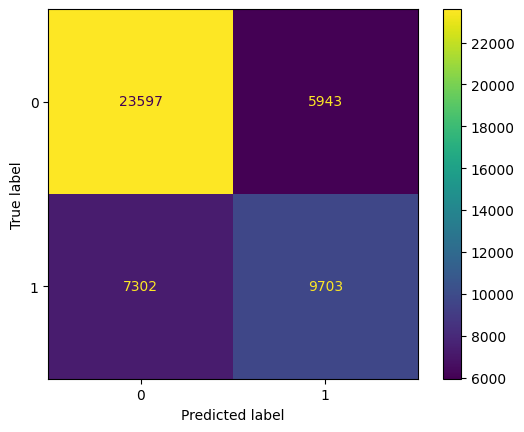

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_nn)
# Provide the explicit class labels [0, 1] to display_labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

In [ ]:
# accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_nn))

Accuracy: 0.7154366741862713


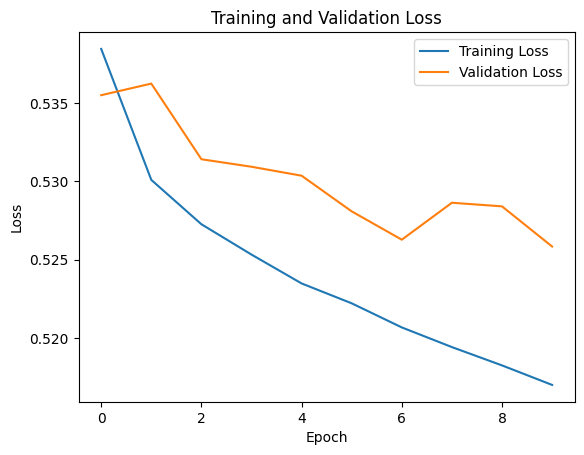

In [ ]:
#visualize
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#model with drop out
model_nn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

#compile model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train
history = model_nn.fit(X_train_processed, y_train, epochs=10, batch_size=32, validation_split=0.2 , verbose = 0)

#evaluate
y_pred_nn = (model_nn.predict(X_test_processed) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred_nn))
#accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred_nn))

1455/1455 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Confusion Matrix:
 [[26926  2614]
 [ 3585 13420]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79     29540
           1       0.65      0.45      0.53     17005

    accuracy                           0.71     46545
   macro avg       0.69      0.66      0.66     46545
weighted avg       0.70      0.71      0.70     46545

Accuracy: 0.7118917176925555


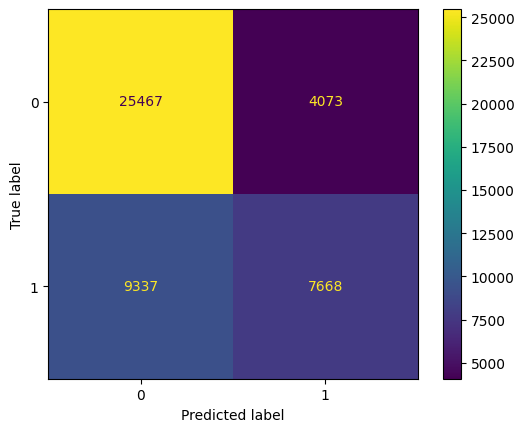

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_nn)
# Provide the explicit class labels [0, 1] to display_labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

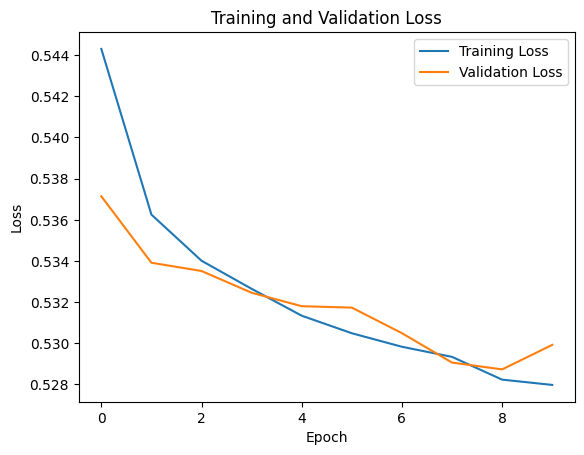

In [ ]:
#visualize
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

**Model Comparison: "Which Algorithm Performs Best?"**

Visual: Bar Chart (Accuracy Comparison)

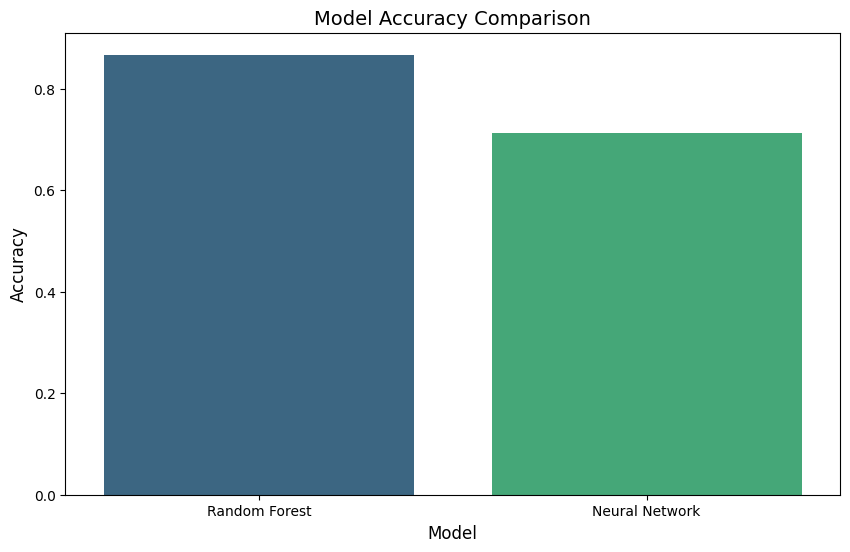

In [ ]:
#visualize accuracy scores of both models using a bar chart
models = ['Random Forest', 'Neural Network']
accuracy_scores = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_nn)]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy_scores, palette='viridis')
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.show()


The Random Forest model outperforms the neural network with an accuracy of 87%

# Clustering of featuers using Kmeans

instantiating PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_processed)

PCA()

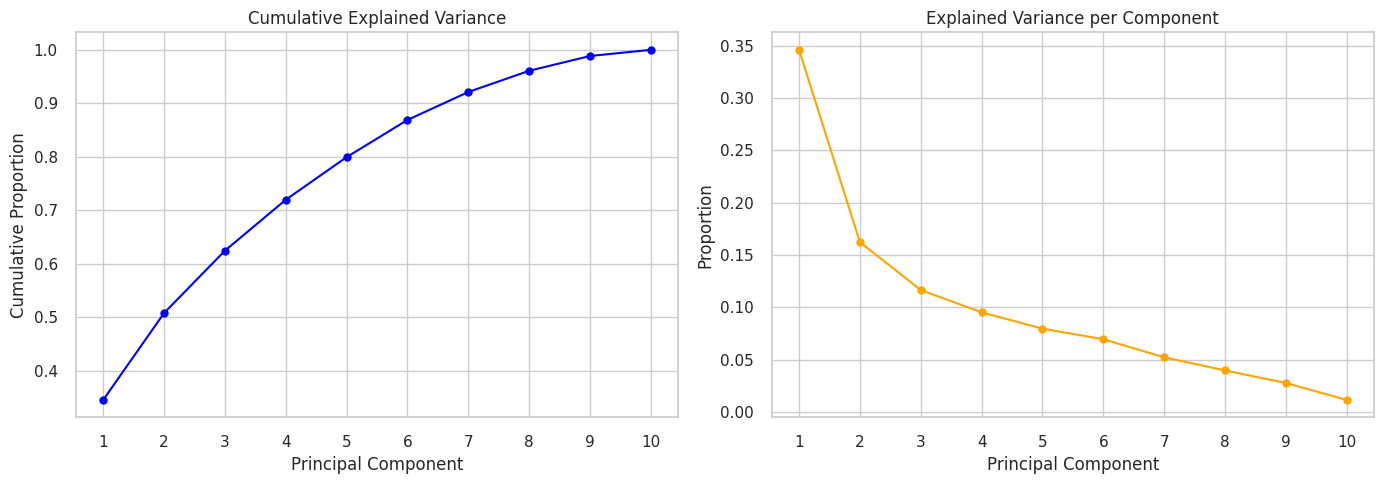

In [ ]:
# Get explained variance ratios and cumulative values
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Number of components available
n_components = len(explained_variance_ratio)

# Create side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Subplot 1: Cumulative Explained Variance
axs[0].plot(range(1, n_components + 1), cumulative_variance, marker='o', color='blue')
axs[0].set_title("Cumulative Explained Variance")
axs[0].set_xlabel("Principal Component")
axs[0].set_ylabel("Cumulative Proportion")
axs[0].set_xticks(range(1, n_components + 1))
axs[0].grid(True)

# Subplot 2: Individual Explained Variance
axs[1].plot(range(1, n_components + 1), explained_variance_ratio, marker='o', color='orange')
axs[1].set_title("Explained Variance per Component")
axs[1].set_xlabel("Principal Component")
axs[1].set_ylabel("Proportion")
axs[1].set_xticks(range(1, n_components + 1))
axs[1].grid(True)

# Tight layout
plt.tight_layout()
plt.show()


In [ ]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_train_processed)


# Defining Optimal number of clusters

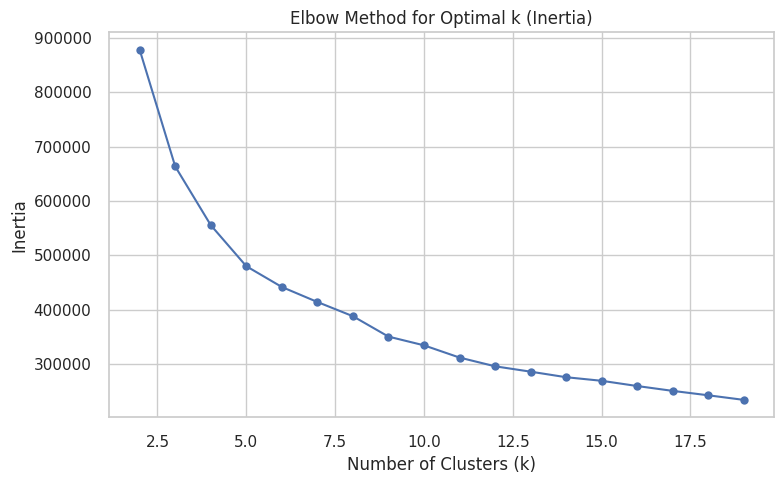

In [ ]:
from sklearn.cluster import KMeans


k_range = range(2, 20)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method for Optimal k (Inertia)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# DataFrame with PCA components vectors and custer data

In [ ]:

pca_df = pd.DataFrame(X_pca, columns=[f'pca{i}' for i in range(X_pca.shape[1])], index=X_train_processed.index)

# Add cluster labels
pca_df['cluster'] = clusters
pca_df.head()

pca0      pca1      pca2      pca3  cluster
200510 -3.531031 -0.911163  0.121935  0.607497        4
19161   1.001511 -0.447296  1.692754  1.243980        3
130619  1.720079 -0.058883  1.057751  0.783298        3
215414  1.357668 -0.765146 -1.210007 -0.176786        2
226822 -0.301118  0.721914 -0.582330 -1.150812        0

# Visualising clusters in 2d using 2PCAs

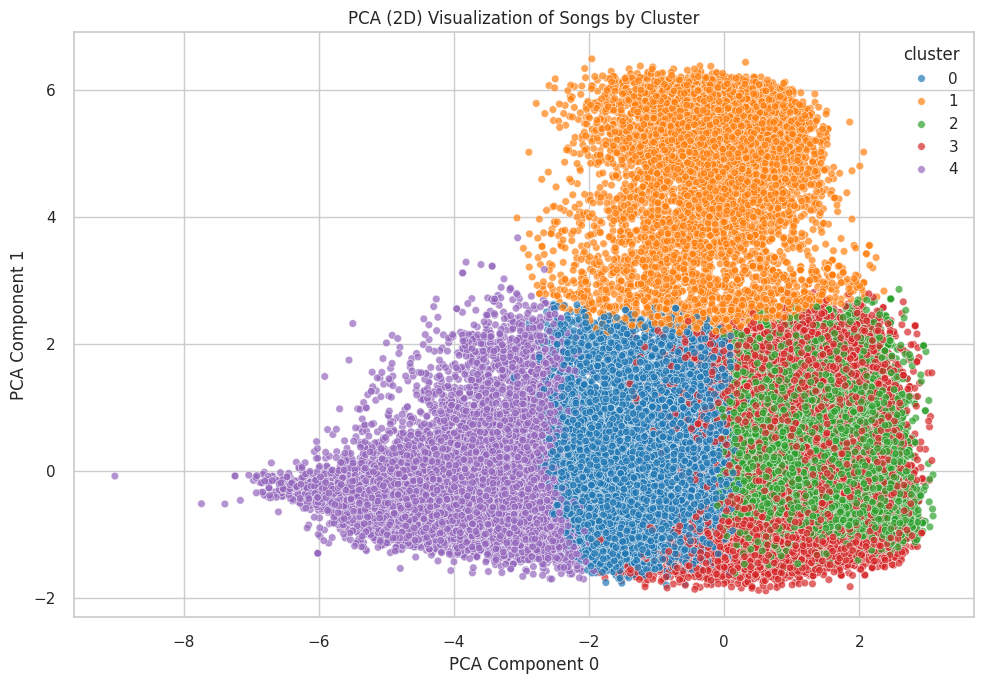

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=pca_df,
    x='pca0', y='pca1',
    hue='cluster',
    palette='tab10',
    s=30,
    alpha=0.7,
    legend='full'
)

plt.title('PCA (2D) Visualization of Songs by Cluster')
plt.xlabel('PCA Component 0')
plt.ylabel('PCA Component 1')
plt.grid(True)
plt.tight_layout()
plt.show()


# Rebuilding the data frame
- add PCA vector data and clusters to Original Dataframe

In [ ]:
X_train_processed['track_id'] = df_OG.loc[X_train_processed.index, 'track_id']
X_train_processed.head()

pca_df['track_id'] = X_train_processed['track_id']
pca_df.head()

df_OG_with_clusters = df_OG.merge(
    pca_df[['track_id', 'cluster']],
    on='track_id',
    how='left'
)
df_OG_with_clusters.head()

df_clustered_only = df_OG_with_clusters.dropna(subset=['cluster'])
df_clustered_only.head()

# Merge PCA components with the clustered metadata
df_final = df_clustered_only.merge(
    pca_df.drop(columns=['cluster']),
    on='track_id',
    how='left'
)
df_final.columns
df_final.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie     Henri Salvador    Le petit souper aux chandelles   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0Mf1jKa8eNAf1a4PwTbizj           0         0.749         0.578   

   duration_ms  energy  instrumentalness  ...   mode  speechiness    tempo  \
0        99373  0.9100               0.0  ...  Major       0.0525  166.969   
1       137373  0.7370               0.0  ...  Minor       0.0868  174.003   
2       170267  0.1310               0.0  ...  Minor       0.0362   99.488   
3       152427  0.3260               0.0  ...  Major       0.0395  171.758   
4       160627  0.0948               0.0  ...  Major       0.1430   87.479   

  time_signature  valence  cluster      pca0      pca1      pca2      pca3  
0            4/4    0.814      3.0  1.609485  0.017844  0.244817  2.031413  
1            4/4    0.816      3.0  1.786869 -0.725202 -0.268731  1.500279  
2            5/4    0.368      0.0 -1.669864 -0.102246 -1.743141 -0.203859  
3            4/4    0.227      0.0 -1.476204 -0.797117  0.569725  2.064958  
4            4/4    0.358      0.0 -1.774959  0.240303 -1.624785 -0.277588  

[5 rows x 23 columns]

In [ ]:
#X_train_processed['track_name'] = df_OG.loc[X_train_processed.index, 'track_name']
#pca_df['track_name'] = X_train_processed['track_name']
##pca_df.set_index('track_name', inplace=True)

#pca_df.sample(5)

# Violin plots to show distribution of clusters across featuers

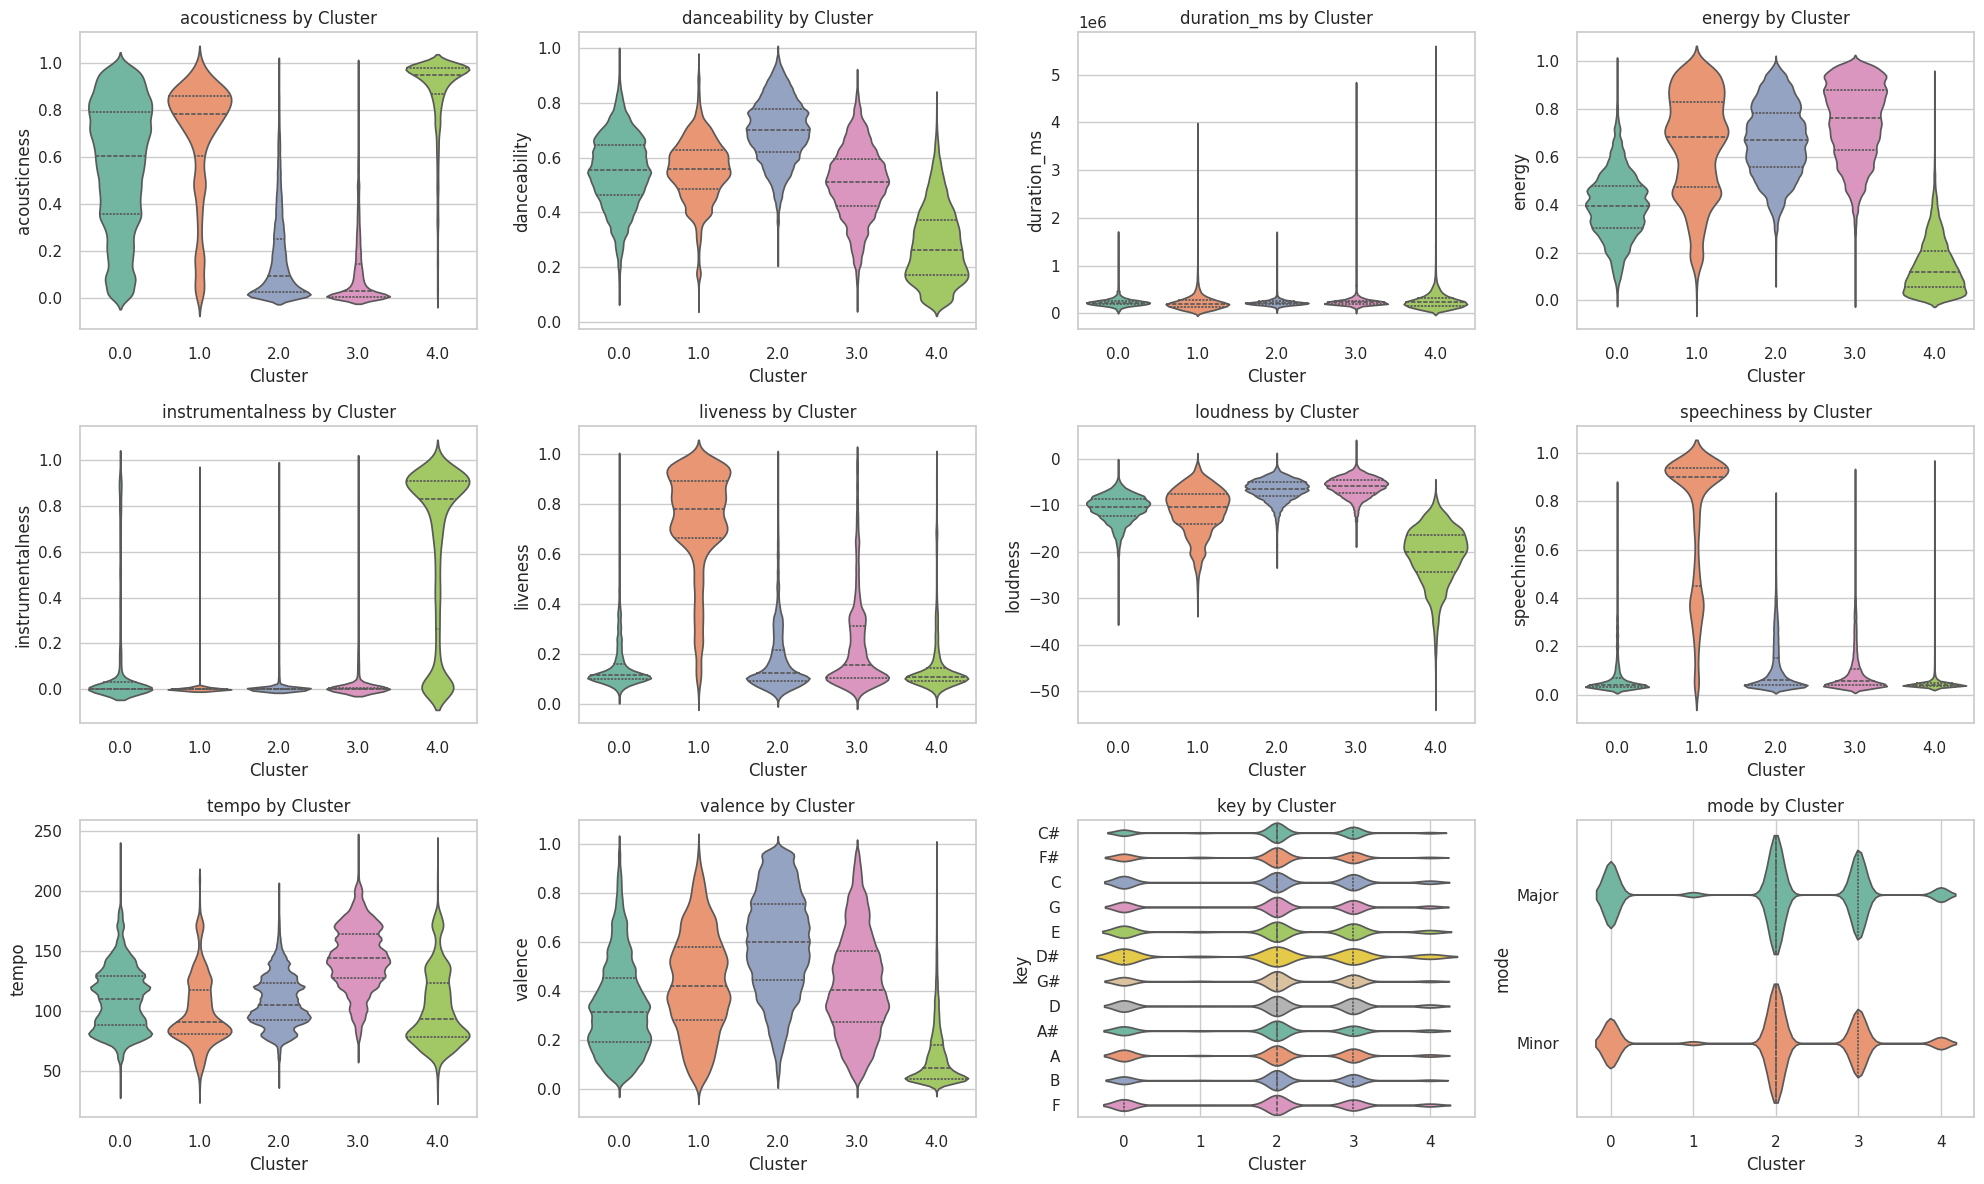

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features you want to plot
features_to_plot = [
    'acousticness', 'danceability', 'duration_ms', 'energy',
    'instrumentalness', 'liveness', 'loudness',
    'speechiness', 'tempo', 'valence','key','mode'
]

# Plot settings
sns.set(style="whitegrid")
n_features = len(features_to_plot)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division

plt.figure(figsize=(20, n_rows * 4))

for i, feature in enumerate(features_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(data=df_final, x='cluster', y=feature, inner='quartile', scale='width', palette='Set2')
    plt.title(f'{feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# Song recomedations


- Goal
 Input: A song (row) from the test set — with the same features as training data.
Output: 5 most similar songs from df_final using PCA-transformed features and Euclidean distance.

In [ ]:
# Rebiulding X_test_procesed to add track name data
reff_df = X_test_processed.copy()
reff_df['track_name'] = df_OG.loc[reff_df.index, 'track_name']
reff_df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'track_name'],
      dtype='object')

# recomandation funcution definintion

"""
    Recommends songs based on PCA-distance from a test song.

    Parameters:
        test_song_row: 1-row DataFrame or array from the processed test set
        df_final: Final DataFrame containing PCA features and metadata
        pca_model: Fitted PCA object
        n_recommendations: Number of songs to recommend

    Returns:
        DataFrame with recommended songs
    """

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

def recommend_similar_from_test_song(test_song_row, df_final, pca_model, ref_df=None, n_recommendations=5):


    # PCA transform
    test_song_pca = pca_model.transform(test_song_row)

    # Extract PCA features from final dataset
    pca_columns = [col for col in df_final.columns if col.startswith("pca")]
    final_pca_values = df_final[pca_columns].values

    # Calculate distances
    distances = euclidean_distances(final_pca_values, test_song_pca).flatten()

    # Get top N closest songs
    top_indices = distances.argsort()[:n_recommendations]
    recommendations = df_final.iloc[top_indices].copy()
    recommendations["distance"] = distances[top_indices]

    # Fetch test song name from the rebuiled df of X_test_proceded reff_df
    test_index = test_song_row.index[0]
    test_song_name = None
    if reff_df is not None and 'track_name' in reff_df.columns:
        test_song_name = reff_df.loc[test_index, 'track_name']

    return test_song_name, recommendations


# Engine in action

In [ ]:
X_test_processed.shape

(46545, 10)

In [ ]:

test_song_row = X_test_processed.iloc[[1460]] # input row from X_test to fetch audio featuersfor the song and song

# Run recommendation
test_song_name, recommended_songs = recommend_similar_from_test_song(
    test_song_row, df_final, pca_model=pca, ref_df=X_test, n_recommendations=5
)

# Display
print(f" Recommendations for: {test_song_name}\n")
print(recommended_songs[['track_name', 'artist_name', 'genre', 'cluster', 'distance']])


 Recommendations for: Comin' On Strong

                 track_name   artist_name      genre  cluster  distance
508815               Quizas     Tony Dize  Reggaeton      2.0  0.117098
502771       Monkey Spanner  Dave Collins     Reggae      2.0  0.126644
596432       La Gata Suelta    Luny Tunes  Reggaeton      2.0  0.142139
625890  Walk Down The River  Common Rider        Ska      2.0  0.151665
625196    Conscious Burning  Common Rider        Ska      2.0  0.151916
